## INTRODUCTION


We are working for the online store Ice, which sells video games worldwide. User and expert reviews, genres, platforms (e.g., Xbox or PlayStation), and historical sales data for games are available from open sources. We need to identify patterns that determine whether a game is successful or not. This will allow us to detect promising projects and plan advertising campaigns. 

We have data going back to 2016. Prettending we are in December 2016, and we're planning a campaign for 2017.

The dataset contains a "rating" column that stores the ESRB rating for each game. The Entertainment Software Rating Board (ESRB) evaluates a game's content and assigns an age rating, such as Teen or Mature.

Theses Datasets come from the ___TrippleTen - Data Scientis Course___.

___Request___ 

For each region (NA, EU, JP), determine:

- The top five platforms. 
- The top five genres.
- Whether ESRB ratings affect sales in individual regions.

___Questions___

-  How many games were released each year?
- What is the total income per platform?
- How have the sales figures evolved for each platform over time?
- How long does it generally take for new platforms to emerge and old ones to disappear?
- Which platforms are leaders in sales? 
- How do user and critic scores influence the sales performance of a video game across different platforms?
- How different are the sales of Games Across Platforms?
- How do sales differ across genres? 

___Hypothesis___

- The average user ratings for the Xbox One and PC platforms are the same.
- The average user ratings for the Action and Sports genres are different.

## DATA DESCRIPTION

- Name (Name of game)
- Platform
- Year_of_Release
- Genre 
- NA_sales (sales in North America in millions of US dollars)
- EU_sales (sales in Europe in millions of US dollars)
- JP_sales (sales in Japan in millions of US dollars)
- Other_sales (sales in other countries in millions of US dollars)
- Critic_Score (maximum of 100)
- User_Score (maximum of 10)
- Rating (ESRB)

In [125]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats as st 

In [126]:
games_df = pd.read_csv('games.csv')
games_df.columns = games_df.columns.str.lower()

In [127]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Remarks

Most of the columns have missing values, so it will be necessary to check if they can be filled, excluded, or if they are irrelevant for the analysis.
- The year_of_release column should be converted to an integer type.
- The critic_score column should be converted to an integer type.
- The user_score column should be converted to a floating type.

## PRE-PROCESSING

In [128]:
# Data type convertion
games_df['year_of_release'] = pd.to_numeric(games_df['year_of_release'],errors='coerce')
games_df['year_of_release'] = games_df['year_of_release'].astype('Int64')

games_df['critic_score'] = pd.to_numeric(games_df['critic_score'],errors='coerce')
games_df['critic_score'] = games_df['critic_score'].astype('Int64')

games_df['user_score'] = pd.to_numeric(games_df['user_score'],errors='coerce')

In [129]:
# Fulling missing values with 'unknown'
games_df['rating'].fillna('unknown',inplace = True)
games_df['name'].fillna('unknown',inplace = True)
games_df['genre'].fillna('unknown',inplace = True)

games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


C:\Users\JoseC\AppData\Local\Temp\ipykernel_11964\815479533.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games_df['rating'].fillna('unknown',inplace = True)
C:\Users\JoseC\AppData\Local\Temp\ipykernel_11964\815479533.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

Remarks

It was decided not to remove the missing values since doing so would result in losing valuable information from other columns, which we will need for other analyses.

Regarding the missing values, the following conclusions were reached:

- ___year_of_release:___ It is likely that these are games that are either very little known or for which no release record was found.
- ___critic_score:___ Not all games receive reviews or ratings from critics.
- ___user_score:___ Not all users rate games. In the case of tbd (to be determined), these can be considered as scores that have not yet been decided, so there is no need to replace them with 0 or NaN.
- ___rating:___ Not all games have a rating assigned.

- If more specific information is needed, it is better to apply a filter and exclude all values that are unnecessary.
- The Object type columns were filled with the value 'Unknown' where applicable.






In [130]:
# Creating a new column
games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales']
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,unknown,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,unknown,30.38


## QUESTIONS

1. How many games were released each year?
2. What is the total income per platform?
3. How have the sales figures evolved for each platform over time?
4. How long does it generally take for new platforms to emerge and old ones to disappear?
5. Which platforms are leaders in sales? 
6. How do user and critic scores influence the sales performance of a video game across different platforms?
7. How different are the sales of Games Across Platforms?
8. How do sales differ across genres? 

### Games released per year

In [131]:
# Creating a new Dataset
games_release_per_year = games_df.groupby(by='year_of_release')['platform'].count().reset_index()
games_release_per_year.sample(5)

,year_of_release,platform
20,2000,350
3,1983,17
15,1995,219
17,1997,289
26,2006,1006


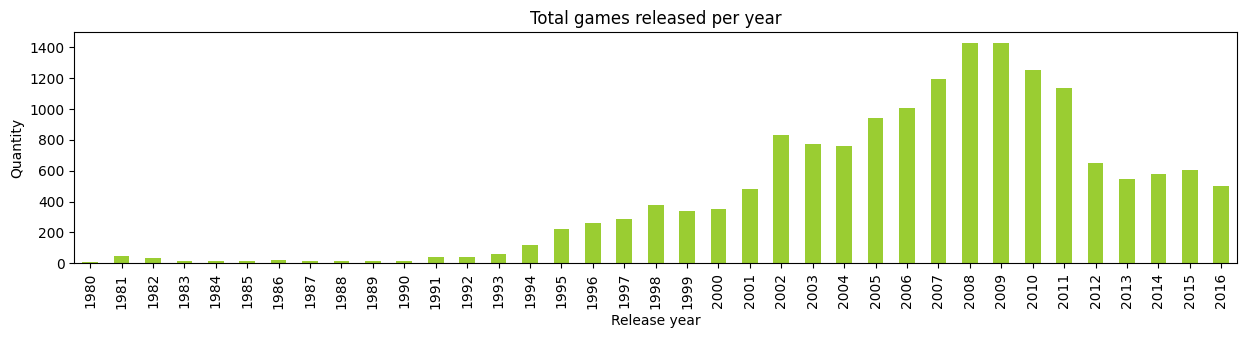

In [132]:
# Chart 1
games_release_per_year.plot(x = 'year_of_release',
                        y = 'platform',
                        kind = 'bar',
                        xlabel = 'Release year', 
                        ylabel = 'Quantity',
                        title = 'Total games released per year',
                        figsize =[15,3],
                        legend = False,
                        color = 'yellowgreen'
                        )
plt.show()

Remarks

- It can be observed that during the period from 2002 to 2012, the video game creation market experienced a significant increase (2001 to 2002) and a notable decline (2011 to 2012), with 2008 and 2009 being the historical peaks for video game creation.
- Before 1994, video game creation was not very prominent.
- The creation of video games stabilized starting from 2012.

### Total income per platform

In [133]:
platform_year_sales = games_df.groupby(by = 'platform')['total_sales'].sum().sort_values(ascending = False).reset_index()
platform_year_sales.sample(5)

,platform,total_sales
6,GBA,310.12
18,2600,96.07
0,PS2,1062.33
24,SCD,1.81
9,XB,249.02


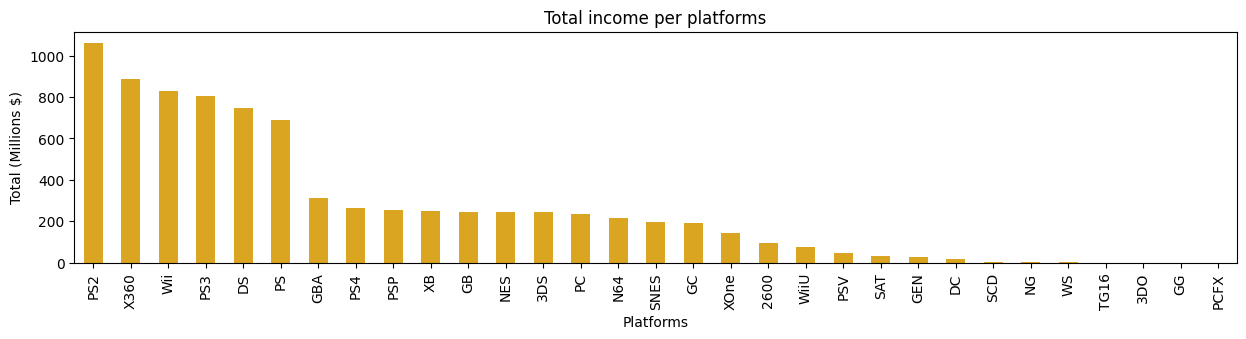

In [134]:
# Chart 2
platform_year_sales.plot(x = 'platform',
                        y = 'total_sales',
                        kind = 'bar',
                        xlabel = 'Platforms', 
                        ylabel = 'Total (Millions $)',
                        title = 'Total income per platforms',
                        figsize =[15,3],
                        legend = False,
                        color = 'goldenrod'
                        )
plt.show()

Remarks

- The 6 platforms with the highest recorded sales are:
  ___PS2 - X360 - Wii - PS3 - DS - PS___

### Sales per platform over the time

In [135]:
# Creation a function to show bar chars
def sales_per_year(df, platform:str,color='blue'):
    sales = df[df['platform'] == platform]
    df_year_sales = sales.groupby(by='year_of_release')['total_sales'].sum().reset_index()
    
    df_year_sales.plot(x = 'year_of_release',
                    y = 'total_sales',
                    kind = 'bar',
                    xlabel = 'Years', 
                    ylabel = 'Total (Millions)',
                    title = f"{platform} total sales per year",
                    figsize =[15,3],
                    legend = False,
                    color = color,
                    )
    plt.show()
    return df_year_sales

#### PS sales record 

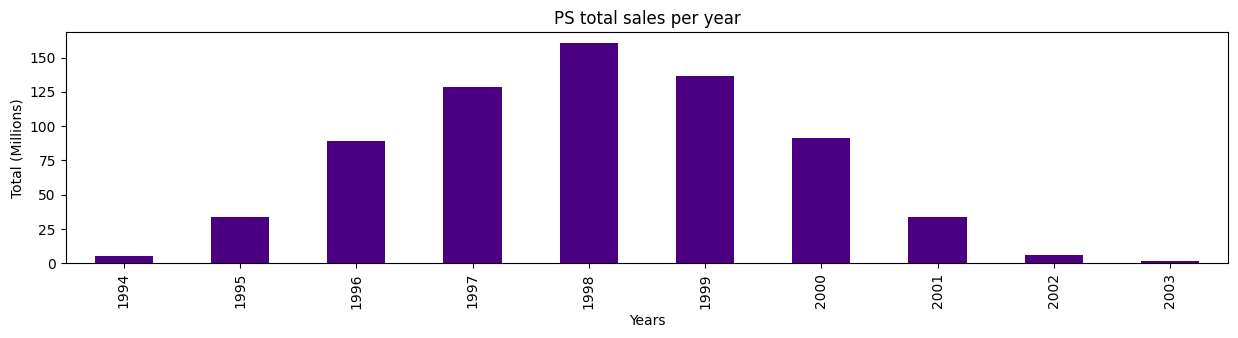

In [136]:
ps_year_sales = sales_per_year(games_df,'PS','indigo')

#### DS sales record

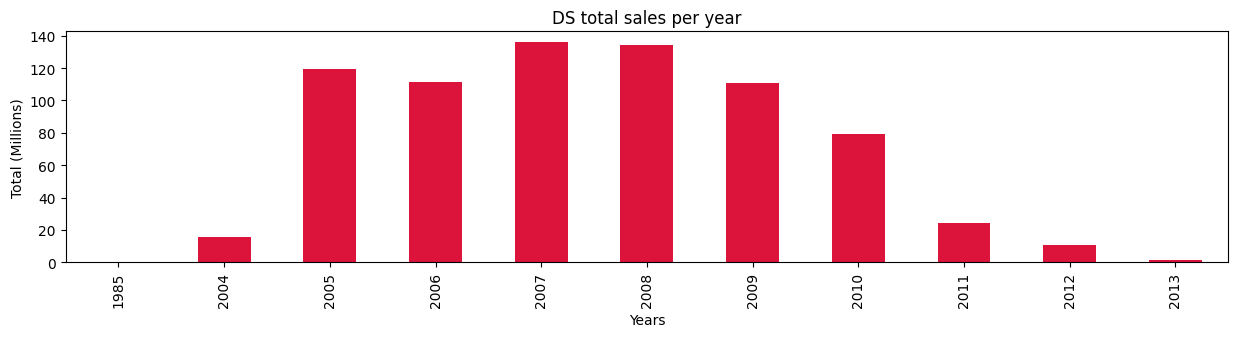

In [137]:
ds_year_sales =sales_per_year(games_df,'DS','crimson')

#### PS3 sales record

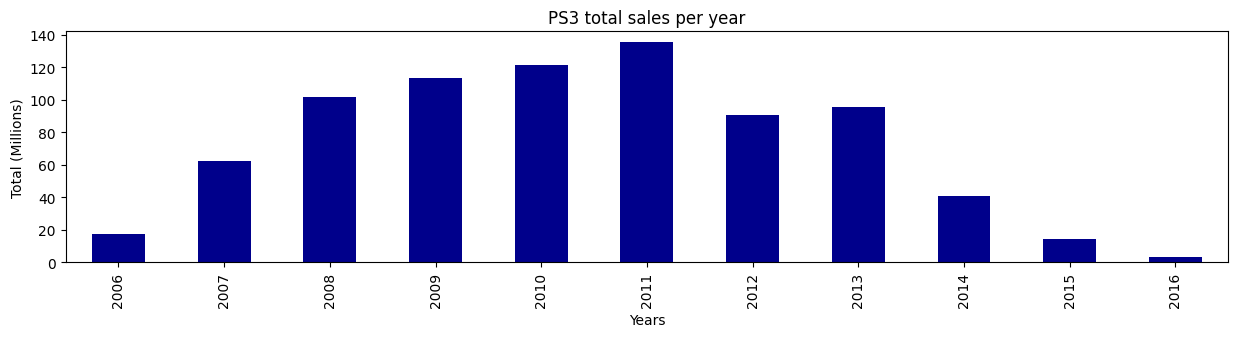

In [138]:
ps3_year_sales = sales_per_year(games_df,'PS3','darkblue')

#### Wii sales record

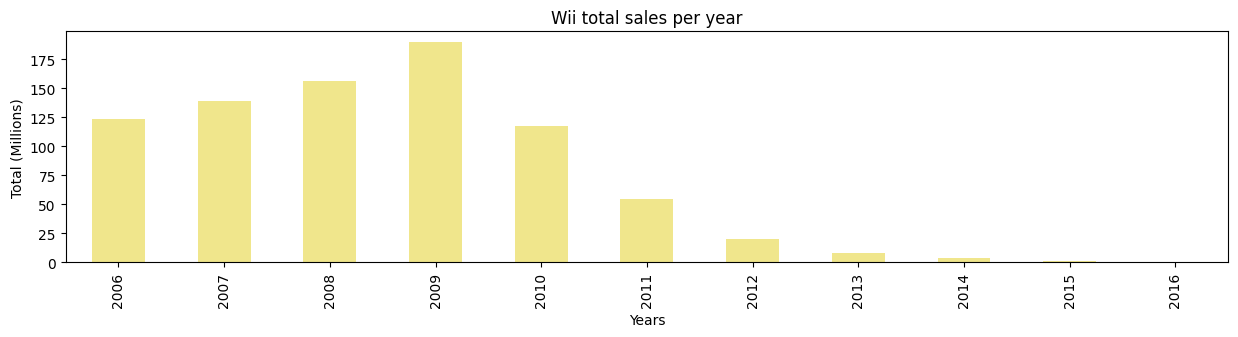

In [139]:
wii_year_sales = sales_per_year(games_df,'Wii','khaki')

#### X360 sales record

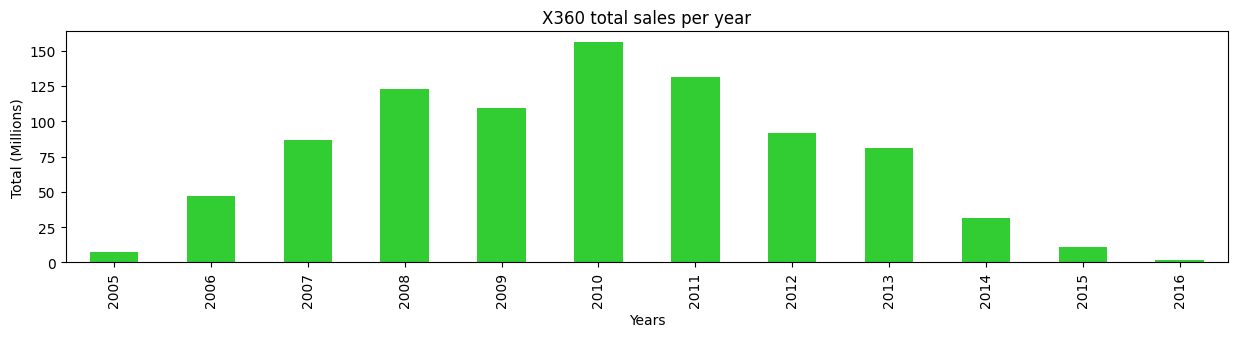

In [140]:
x360_year_sales = sales_per_year(games_df,'X360','limegreen')

#### PS2 sales record

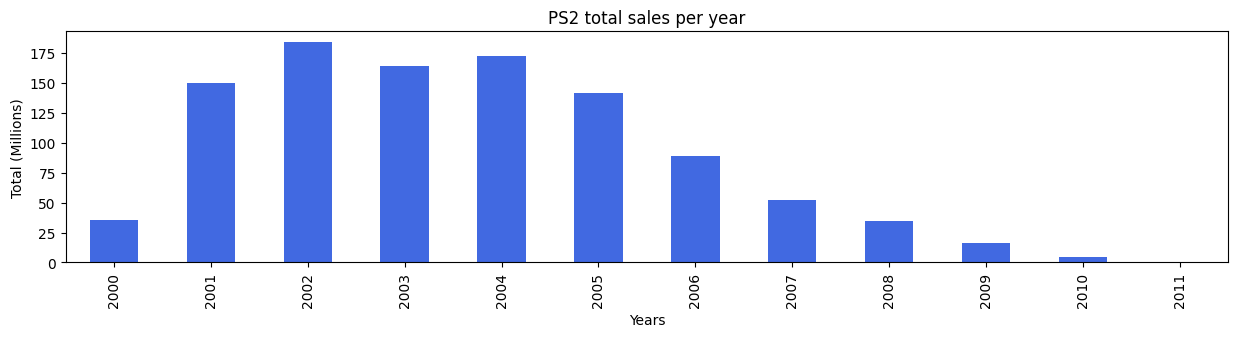

In [141]:
ps2_year_sales = sales_per_year(games_df,'PS2','royalblue')

Remarks

- It is evident that each of the six platforms with the highest sales achieved success during different time periods. 
- Depending on the platform, their peak success typically lasted between 4 to 6 years before declining

### Platform lifespan

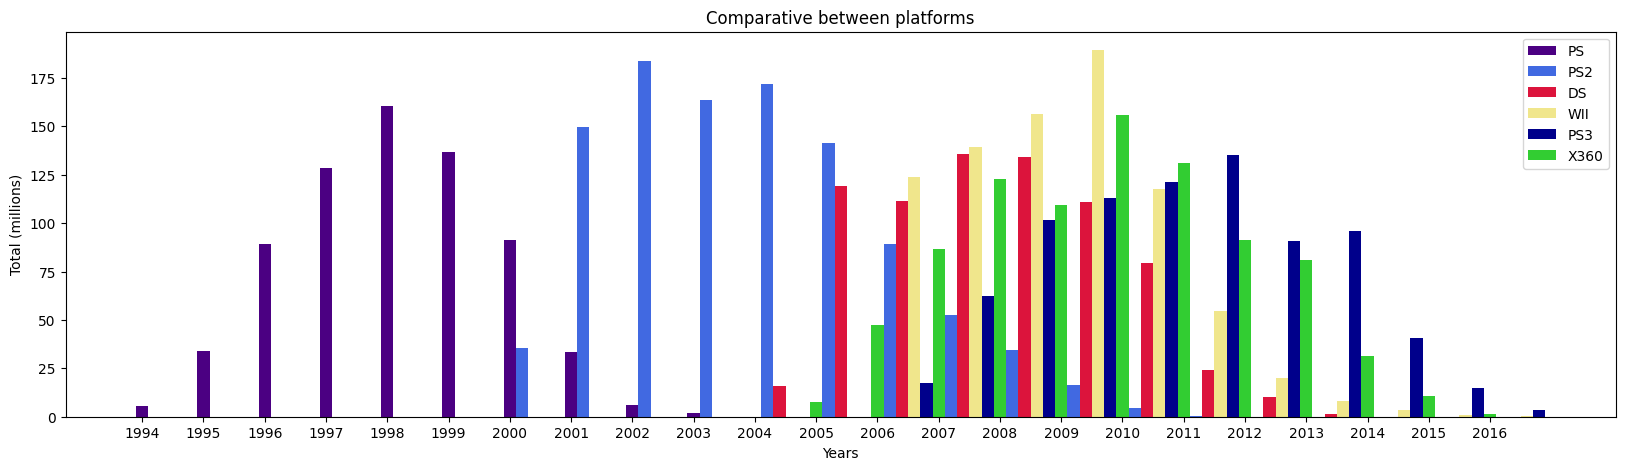

In [142]:
# Creating a Dataset with PS, DS, PS3, Wii, X360, PS2

ds_filter = ds_year_sales[ds_year_sales['year_of_release'] > 1994 ]

# Chart settings
plt.figure(figsize=(20,5))
barWidth = 0.20

# 
plt.bar(ps_year_sales['year_of_release'], ps_year_sales['total_sales'], color = 'indigo', width = barWidth, label= 'PS')
plt.bar(ps2_year_sales['year_of_release']+ 0.20, ps2_year_sales['total_sales'], color = 'royalblue', width = barWidth, label= 'PS2')
plt.bar(ds_filter['year_of_release'] + 0.40, ds_filter['total_sales'], color = 'crimson', width = barWidth, label= 'DS')
plt.bar(wii_year_sales['year_of_release']+ 0.60, wii_year_sales['total_sales'], color = 'khaki', width = barWidth, label= 'WII')
plt.bar(ps3_year_sales['year_of_release']+ 0.80, ps3_year_sales['total_sales'], color = 'darkblue', width = barWidth, label= 'PS3')
plt.bar(x360_year_sales['year_of_release'], x360_year_sales['total_sales'], color = 'limegreen', width = barWidth, label= 'X360')

# 
plt.title('Comparative between platforms')
plt.xlabel('Years')
plt.ylabel('Total (millions)')

#Obtenemos los años unicos de todos los data frames y los ordenamos
years = sorted(set(ps_year_sales['year_of_release']) | set(ps2_year_sales['year_of_release']) | set(ds_filter['year_of_release']) | set(wii_year_sales['year_of_release']) | set(ps3_year_sales['year_of_release']) | set(x360_year_sales['year_of_release']))
plt.xticks(years)
plt.legend()
plt.show()

In [143]:
y_min = ps_year_sales['year_of_release'].min()
y_max = ps_year_sales['year_of_release'].max()
print(f"PS recorded sales over a period of {y_max - y_min } years, from {y_min} to {y_max}")

y_min = ps2_year_sales['year_of_release'].min()
y_max = ps2_year_sales['year_of_release'].max()
print(f"PS2 recorded sales over a period of {y_max - y_min } years, from {y_min} to {y_max}")

y_min = ds_filter['year_of_release'].min()
y_max = ds_filter['year_of_release'].max()
print(f"DS recorded sales over a period of {y_max - y_min } years, from {y_min} to {y_max}")

y_min = wii_year_sales['year_of_release'].min()
y_max = wii_year_sales['year_of_release'].max()
print(f"WII recorded sales over a period of {y_max - y_min } years, from {y_min} to {y_max}")

y_min = ps3_year_sales['year_of_release'].min()
y_max = ps3_year_sales['year_of_release'].max()
print(f"PS3 recorded sales over a period of {y_max - y_min } years, from {y_min} to {y_max}")

y_min = x360_year_sales['year_of_release'].min()
y_max = x360_year_sales['year_of_release'].max()
print(f"X360 recorded sales over a period of {y_max - y_min } years, from {y_min} to {y_max}")

PS recorded sales over a period of 9 years, from 1994 to 2003
PS2 recorded sales over a period of 11 years, from 2000 to 2011
DS recorded sales over a period of 9 years, from 2004 to 2013
WII recorded sales over a period of 10 years, from 2006 to 2016
PS3 recorded sales over a period of 10 years, from 2006 to 2016
X360 recorded sales over a period of 11 years, from 2005 to 2016


Remarks

- Each platform has an average sales lifespan of 10 years before it disappears.
- There is a 6-year gap between the first two platforms, PS and PS2, while the difference between the platforms DS, Wii, PS3, and X360 is between 1 to 2 years.

### Top plarforms 

C:\Users\JoseC\AppData\Local\Temp\ipykernel_11964\2882287017.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='platform',y='total_sales',data=platforms, palette = palette)


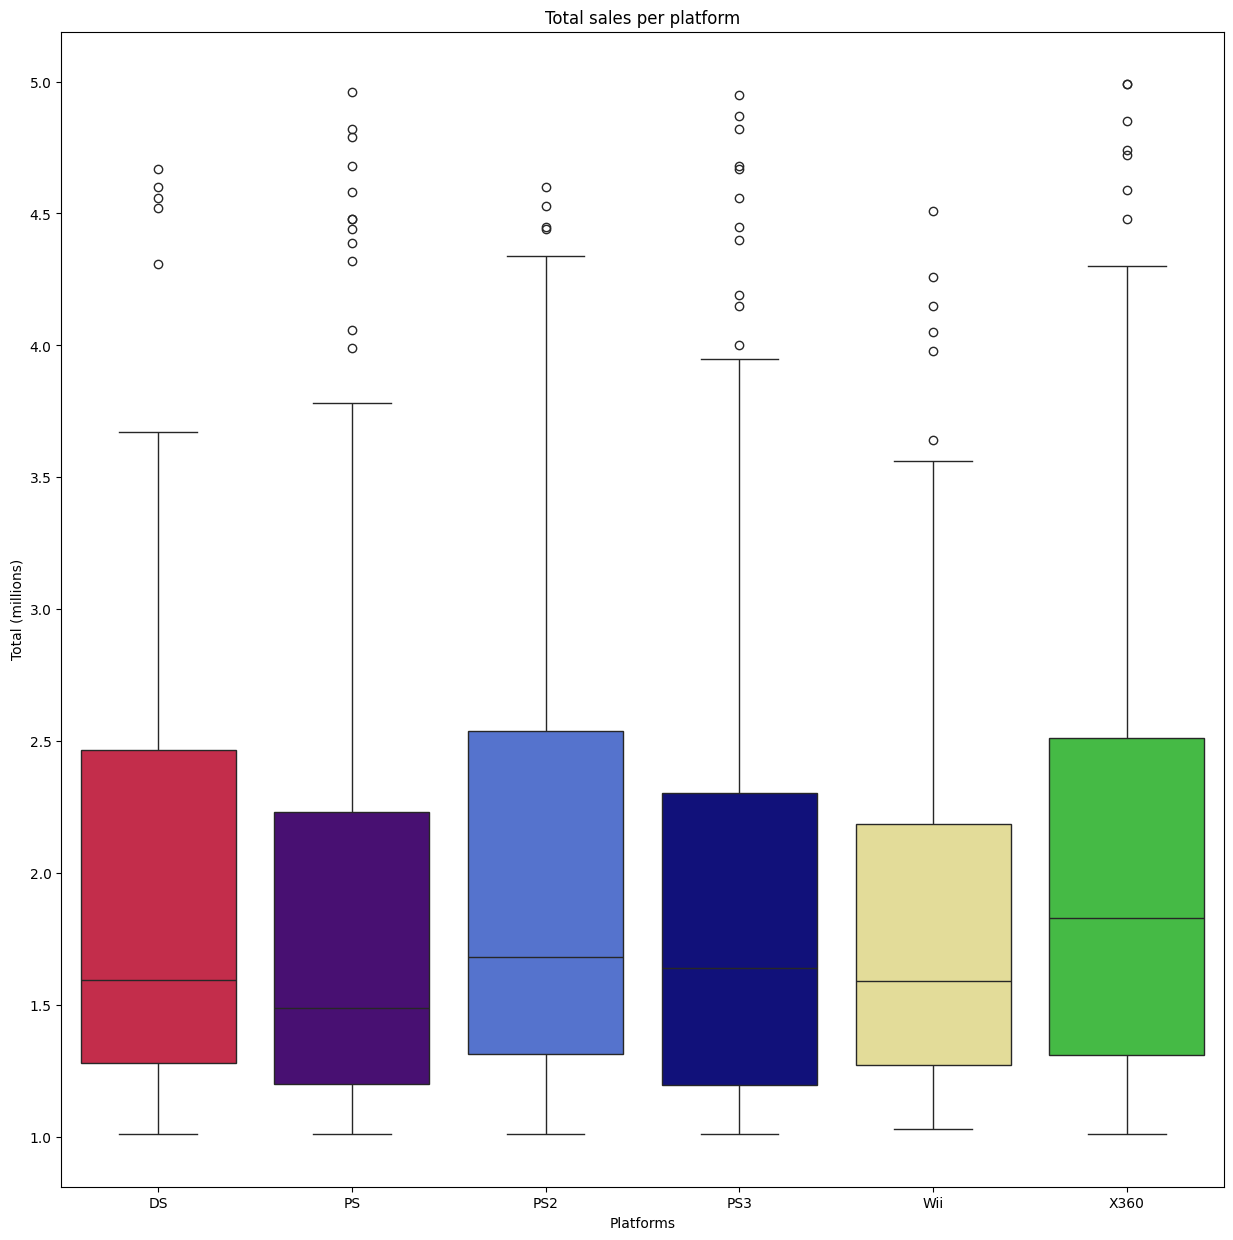

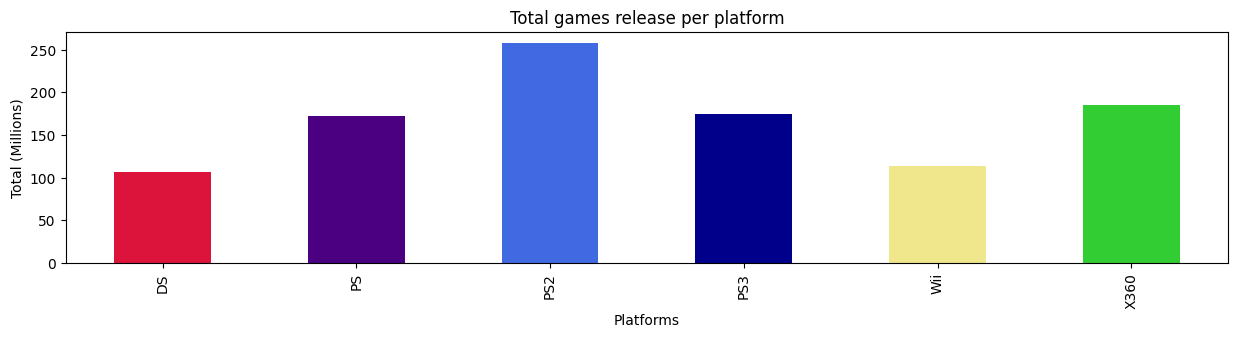

In [144]:
plt.figure(figsize=(15, 15))

# Getting Dataset for some platforms
platforms = games_df[(games_df['platform'] == 'PS') | 
                           (games_df['platform'] == 'PS2') | 
                           (games_df['platform'] == 'DS') | 
                           (games_df['platform'] == 'Wii') | 
                           (games_df['platform'] == 'PS3') | 
                           (games_df['platform'] == 'X360') ]

# Shorting the chart
platforms = platforms[(platforms['total_sales'] > 1) & (platforms['total_sales'] < 5)]
platforms = platforms.sort_values("platform",ascending=True)

# Creating boxplot
palette = ['crimson','indigo','royalblue','darkblue','khaki','limegreen']
sns.boxplot(x='platform',y='total_sales',data=platforms, palette = palette)
plt.xlabel('Platforms')
plt.ylabel('Total (millions)')
plt.title('Total sales per platform')

# Total games per platform
total_games_platforms = platforms.groupby(by='platform')['name'].count().reset_index()
total_games_platforms = total_games_platforms.sort_values("platform",ascending=True)

# barchar
total_games_platforms.plot(x = 'platform',
                    y = 'name',
                    kind = 'bar',
                    xlabel = 'Platforms', 
                    ylabel = 'Total (Millions)',
                    title ="Total games release per platform",
                    figsize =[15,3],
                    legend = False,
                    color = palette,
                    )
plt.show()

- Considering the top 6 companies with the highest revenues, a slight difference can be observed in their average revenues. The ___X360___ platform has the highest average, but when we take into account the number of games released, we can understand why the ___PS2___ platform has the highest total revenue.

- While the number of games released does not guarantee higher revenue per game, it does suggest that the ___PS2___ platform has more successful games in terms of sales. For example, both the ___DS___ and ___Wii___ platforms have similar numbers of games sold, but Wii generates higher revenue than ___DS___. A similar situation occurs with the ___X360___ and ___PS3___ platforms.

### Users and critic scores

We are going to select just one platform for this request

              critic_score  total_sales
critic_score      1.000000     0.392605
total_sales       0.392605     1.000000 

             user_score  total_sales
user_score     1.000000     0.113568
total_sales    0.113568     1.000000


<Axes: title={'center': 'Correlation between user scores and total sales (X360)'}, xlabel='Total (Millions)', ylabel='Scores from 0 to 10'>

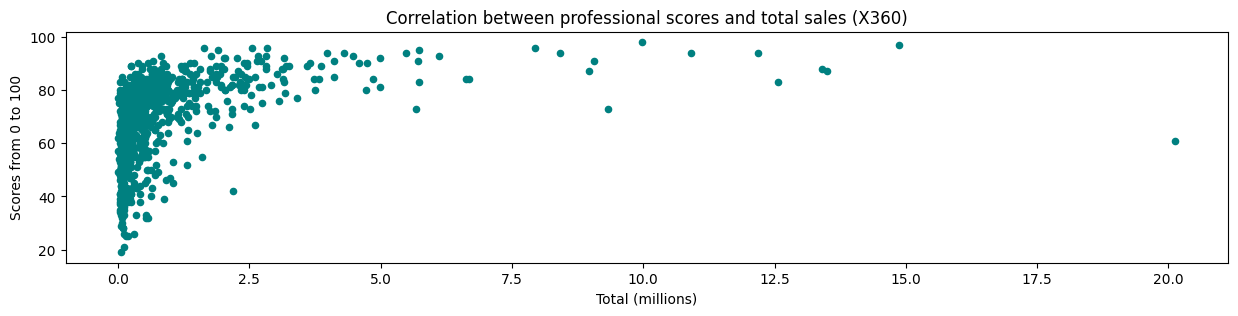

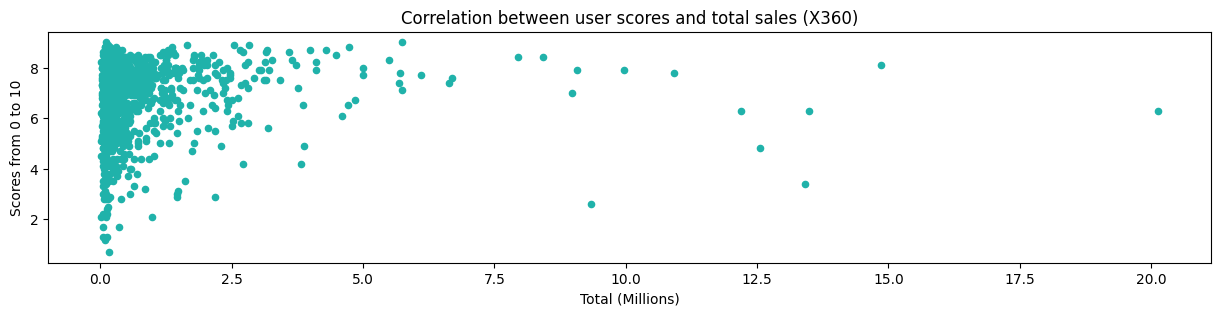

In [145]:
# Creating Dataset
x360_critic_scores = games_df[(games_df['platform'] == 'X360') & (games_df['critic_score'] > 0)][['critic_score','total_sales']]
x360_user_scores = games_df[(games_df['platform'] == 'X360') & (games_df['user_score'] > 0.0)][['user_score','total_sales']]

# Creating a scatter plot
print(x360_critic_scores.corr(), '\n')
x360_critic_scores.plot(x = 'total_sales',
                        y = 'critic_score',
                        kind = 'scatter',
                        xlabel = 'Total (millions)', 
                        ylabel = 'Scores from 0 to 100',
                        title = "Correlation between professional scores and total sales (X360)",
                        figsize =[15,3],
                        legend = False,
                        color='teal',
                        )

print(x360_user_scores.corr())
x360_user_scores.plot(x = 'total_sales',
                        y = 'user_score',
                        kind = 'scatter',
                        xlabel = 'Total (Millions)', 
                        ylabel = 'Scores from 0 to 10',
                        title = "Correlation between user scores and total sales (X360)",
                        figsize =[15,3],
                        legend = False,
                        color='lightseagreen',
                        )

Remarks

- For the X360 platform, it is difficult to determine whether the scores significantly affect sales, as the correlation is below 40%.

### Games sales across platforms

In [146]:
# Creating  a function to print the historical sales of an X360 game across different platforms.
def platform_game_sales(df, name:str,color):
    df_sales = df[df['name'] == name][['platform','total_sales','genre','rating']].sort_values(by='total_sales',ascending=True)
    genre =  df_sales['genre'].unique()
    rating = df_sales['rating'].unique()
    df_sales.plot(x = 'platform',
                    y = 'total_sales',
                    kind = 'bar',
                    xlabel = 'Platforms', 
                    ylabel = 'Total (Millions)',
                    title = f"{name} total sales per platform - Genre: {genre[0]} - rating: {rating[0]}",
                    figsize =[15,3],
                    legend = False,
                    color = color,
                    )
    plt.show()
    return 

In [147]:
# Creating a list of unique X360 games
x360_games = games_df[games_df['platform'] == 'X360']['name'].unique()

# Getting game that are in different platforms
multiplatform_games = games_df.query("name in @x360_games")
multiplatform_games = multiplatform_games.groupby(by='name')[['platform']].count().reset_index()
multiplatform_games = multiplatform_games[multiplatform_games['platform'] > 6]
multiplatform_games.sample(10)

,name,platform
767,Need For Speed: Undercover,7
565,LEGO Star Wars III: The Clone Wars,7
1202,Wall-E,7
1041,The Amazing Spider-Man 2 (2014),7
771,Need for Speed: Most Wanted,12
359,FIFA Soccer 08,7
621,Major League Baseball 2K11,7
353,FIFA 12,7
31,Angry Birds Star Wars,8
561,LEGO Marvel's Avengers,7


Remakrs

- For this analysis, the following titles were selected as a sample:

    - ___FIFA 15, Madden NFL 08, Terraria, and 'LEGO Jurassic World'___, which include two action games and two sports games."

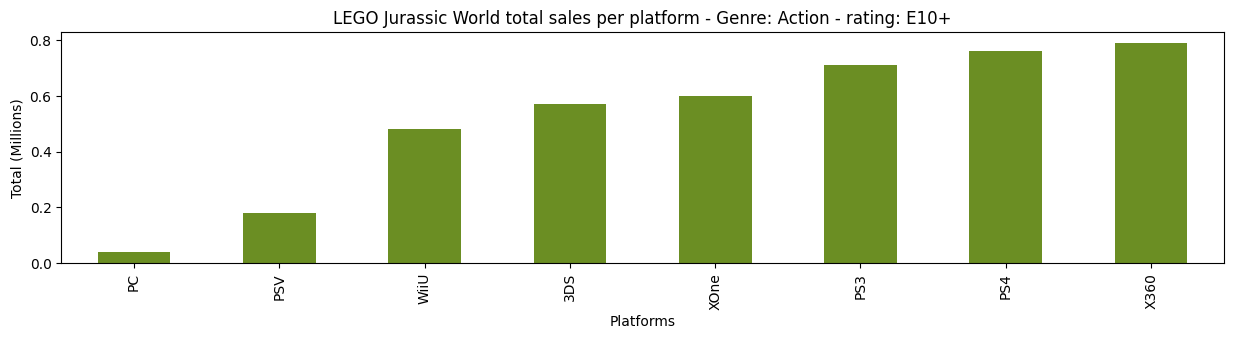

In [148]:
platform_game_sales(games_df,'LEGO Jurassic World','olivedrab')

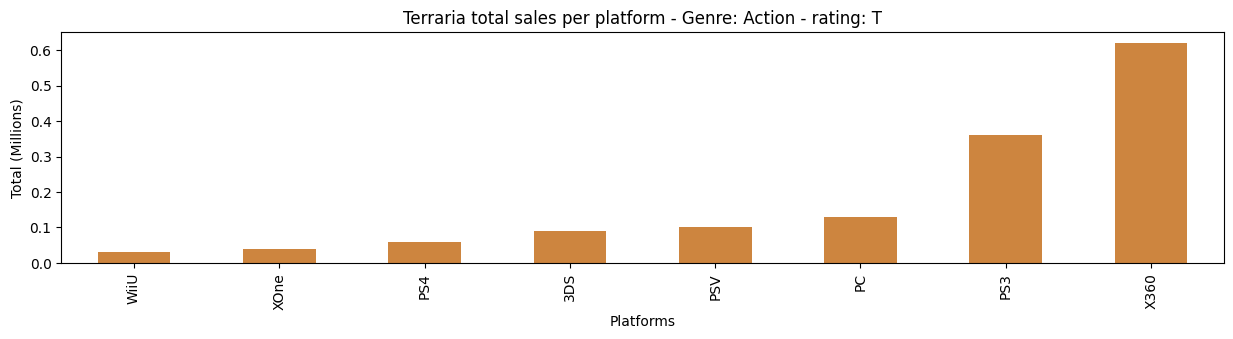

In [149]:
platform_game_sales(games_df,'Terraria','peru')

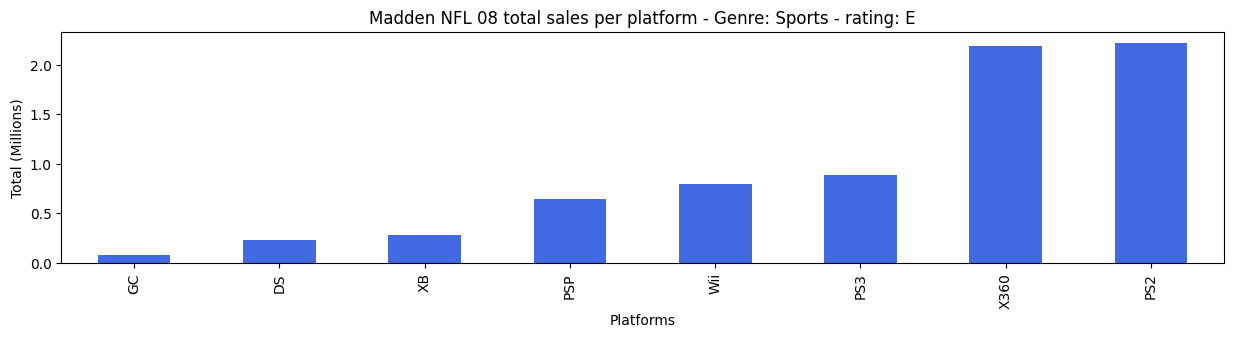

In [150]:
platform_game_sales(games_df,'Madden NFL 08','royalblue')

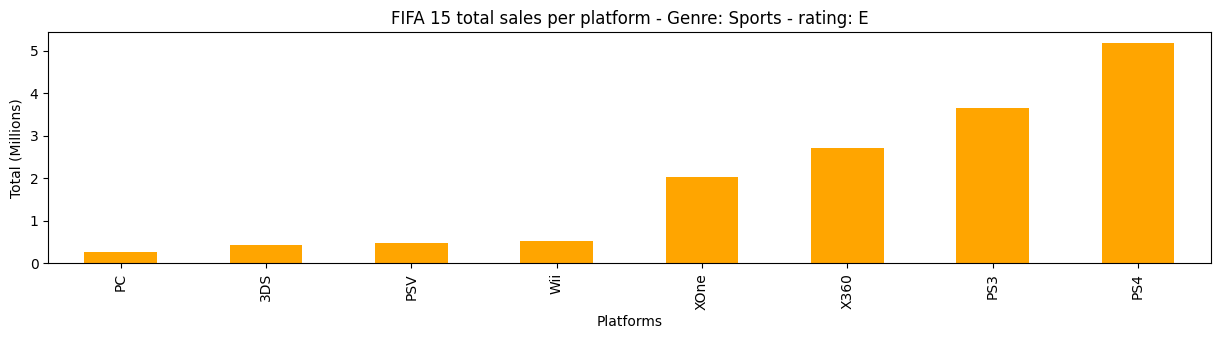

In [151]:
platform_game_sales(games_df,'FIFA 15','orange')

Remarks
- We can observe in this small sample that the X360 platform is among the platforms with the highest sales across different games.

### Sales across genres

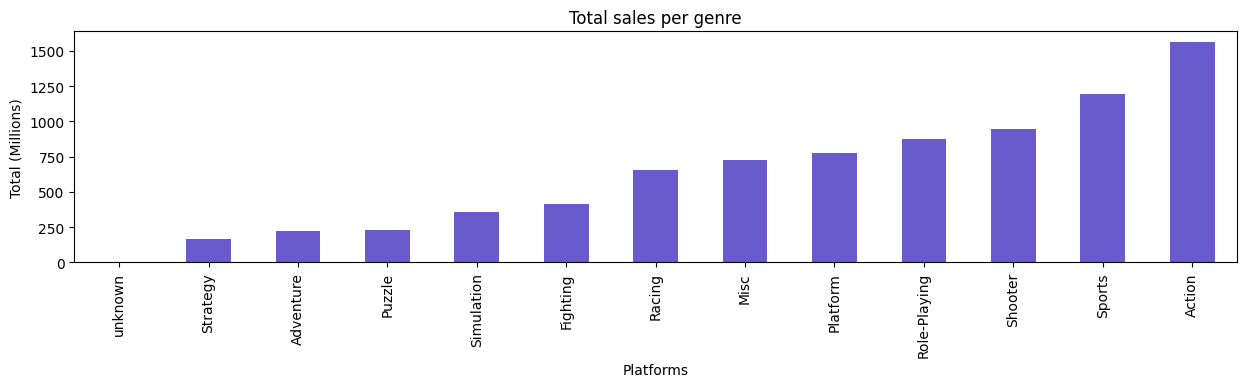

In [152]:
sales_per_genre = games_df.groupby(by='genre')['total_sales'].sum().sort_values(ascending = True).reset_index()
sales_per_genre.plot(x = 'genre',
                    y = 'total_sales',
                    kind = 'bar',
                    xlabel = 'Platforms', 
                    ylabel = 'Total (Millions)',
                    title = "Total sales per genre",
                    figsize =[15,3],
                    legend = False,
                    color = 'slateblue'
                    )
plt.show()

- Based on the bar chart, the following conclusions can be drawn:
    - The top 3 best-selling genres are ___Shooter___, ___Sports___, and ___Action___.
    - The ___Action___ genre is the best-selling.
    - The ___Strategy___ genre is the least sold.

In [153]:
platform_genre_games = games_df.pivot_table(index='platform',columns='genre',values='name',aggfunc='count')

# Top 5 plaftorms with Shooter games 
platform_genre_games['Shooter'].sort_values(ascending = False).reset_index().head(5)

,platform,Shooter
0,X360,203.0
1,PS2,160.0
2,PS3,156.0
3,PC,150.0
4,XB,132.0


In [154]:
# Top 5 plaftorms with Sports games
platform_genre_games['Sports'].sort_values(ascending = False).reset_index().head(5)

,platform,Sports
0,PS2,400.0
1,Wii,260.0
2,PS,222.0
3,X360,217.0
4,PS3,214.0


In [155]:
# Top 5 plaftorms with Action games
platform_genre_games['Action'].sort_values(ascending = False).reset_index().head(5)

,platform,Action
0,PS3,380.0
1,PS2,348.0
2,DS,340.0
3,X360,323.0
4,Wii,237.0


Remarks

- It can be observed that X360 is within the top 5 of the 3 best-selling genres, which could be a notable factor for the total sales recorded.

## REQUESTS

1. The top five platforms. 
2. The top five genres.
3. Whether ESRB ratings affect sales in individual regions.

In [156]:
# Creating a function to get top 5s
def top_5(df,column:str,region:str,color):

    top_5 = df.groupby(by = column)[region].sum().sort_values(ascending = False).reset_index()
    top_5 = top_5.head(5).sort_values(by = region,ascending = True)
    
    if region == 'na_sales':
        x = 'NA'
    elif region == 'eu_sales':
        x = 'EU'
    elif region == 'jp_sales':
        x = 'JP'
    
    if column == 'platform':
        top_5.plot(x = 'platform',
                    y = region,
                    kind = 'bar',
                    xlabel = 'Platforms', 
                    ylabel = 'Total (Millions)',
                    title = f"Total sales per platform in {x}",
                    figsize =[15,3],
                    legend = False,
                    color=color,
                    )
        
    elif column == 'genre':
        top_5.plot(x = 'genre',
                    y = region,
                    kind = 'bar',
                    xlabel = 'Genre', 
                    ylabel = 'Total (Millions)',
                    title = f"Total sales per genre in {x}",
                    figsize =[15,3],
                    legend = False,
                    color=color,
                    )
    plt.show()

#### Top 5 platforms

##### North America

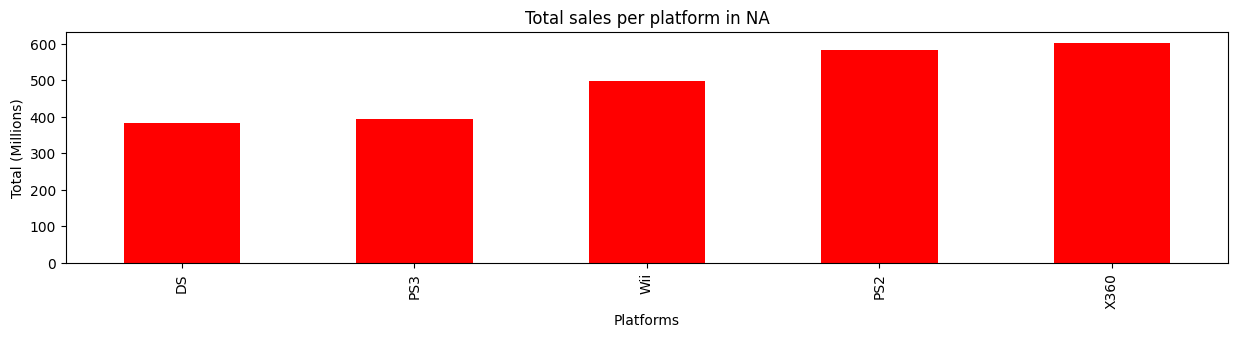

In [157]:
top_5(games_df,'platform','na_sales','red')

##### Europe

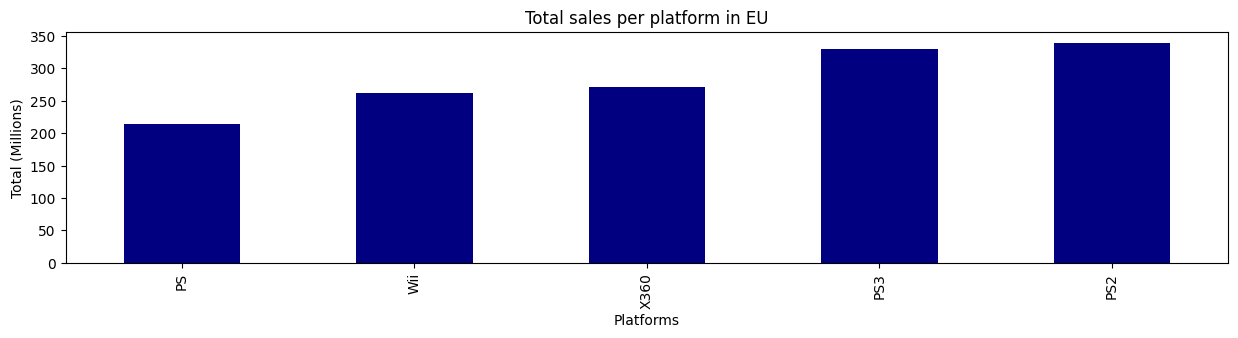

In [158]:
top_5(games_df,'platform','eu_sales','navy')

##### Japan

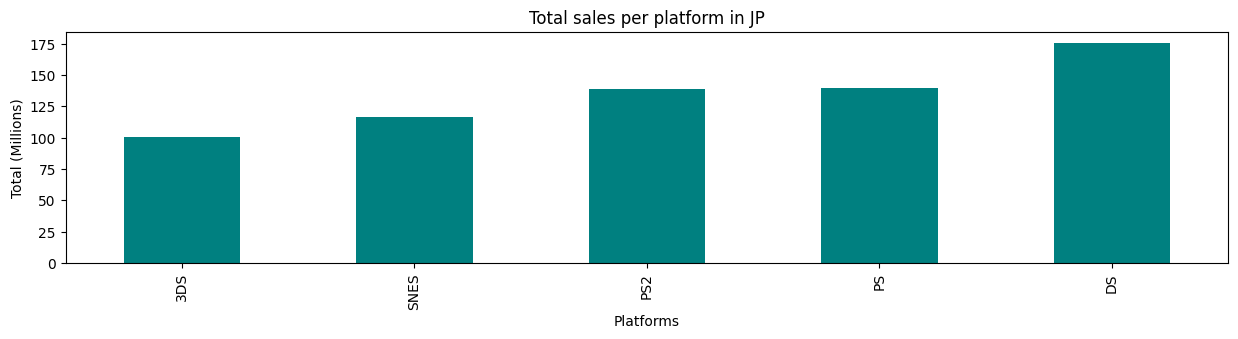

In [159]:
top_5(games_df,'platform','jp_sales','teal')

Remarks

- Based on the bar charts by region, we can find the following results:
    - In the ___NA region___, the two platforms with the highest sales are X360 and PS2.
    - In the ___EU region___, the two platforms with the highest sales are PS3 and PS2.
    - In the ___JP region___, the two platforms with the highest sales are PS and DS.
    - The platforms ___PS, PS2, and PS3___ have the highest presence in all three regions.

### Top 5 genres

##### North America

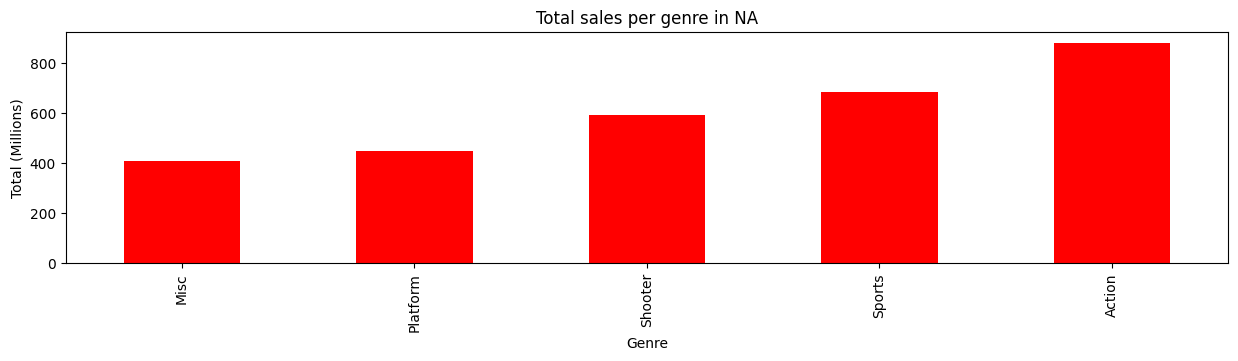

In [160]:
top_5(games_df,'genre','na_sales','red')

##### Europe

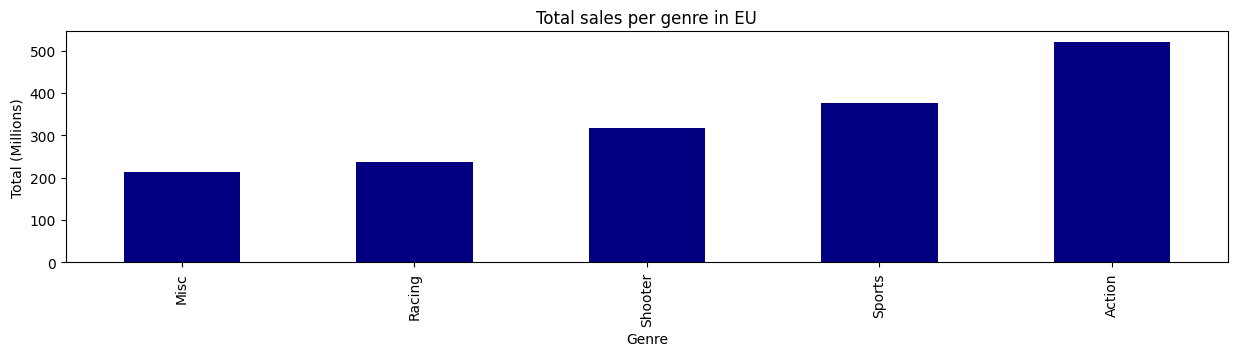

In [161]:
top_5(games_df,'genre','eu_sales','navy')

##### Japan

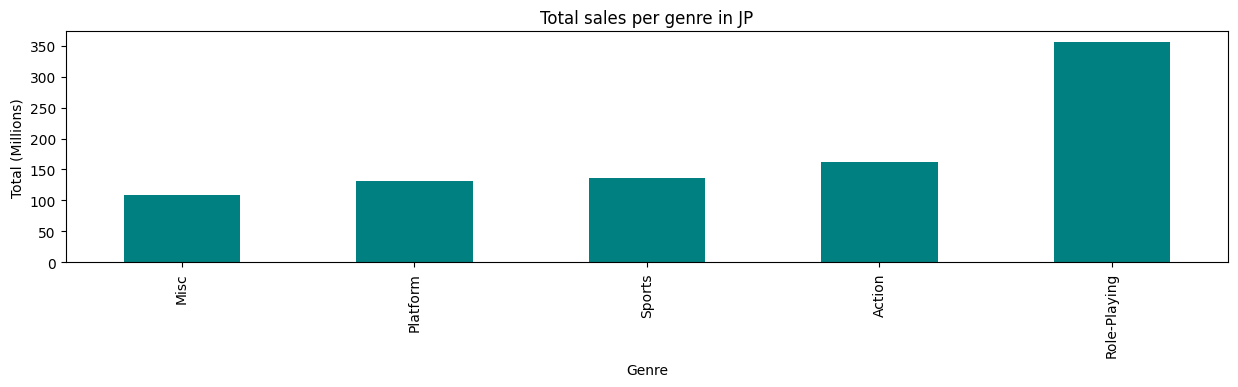

In [162]:
top_5(games_df,'genre','jp_sales','teal')

- Based on the bar charts by genre, we can find the following results:
    - The genres of ___Action___ and ___Sports___ are popular in all three regions.
    - The ___Action___ genre is the most popular in the ___NA___ and ___EU___ regions.
    - The ___Role_Playing___ genre is the most popular in ___JP___.

### ESRB clasificaction per region

In [167]:
def rating_sales(df,sales_region:str,color):
    rating_sales = df[[sales_region,'rating']]
    rating_sales = rating_sales[(~rating_sales['rating'].isna()) & (rating_sales['rating'] != 'unknown')] 
    rating_sales = rating_sales.groupby('rating')[sales_region].sum().sort_values(ascending = False).reset_index()
    
    if sales_region == 'na_sales':
        x = 'NA'
    elif sales_region == 'eu_sales':
        x = 'EU'
    elif sales_region == 'jp_sales':
        x = 'JP'
    
    rating_sales.plot(x = 'rating',
                    y = sales_region,
                    kind = 'bar',
                    xlabel = 'Rating', 
                    ylabel = 'Total (Millions)',
                    title = f"Total sales in {x}",
                    figsize =[15,3],
                    legend = False,
                    color = color
                    )
    return 

##### North America

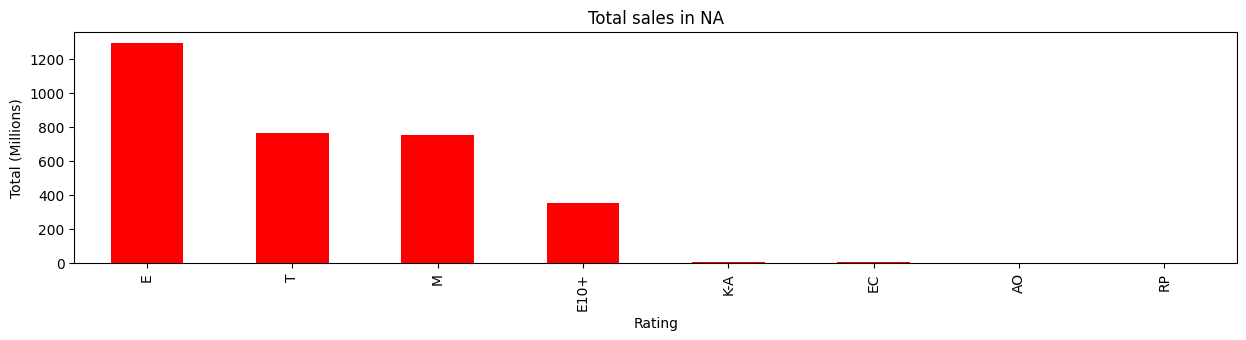

In [168]:
rating_sales(games_df,'na_sales','red')

##### Europe

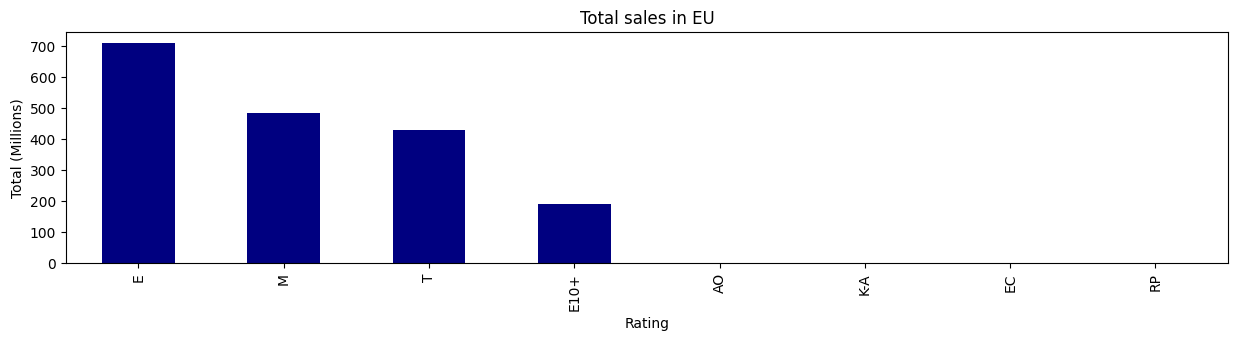

In [169]:
rating_sales(games_df,'eu_sales','navy')

##### Japan

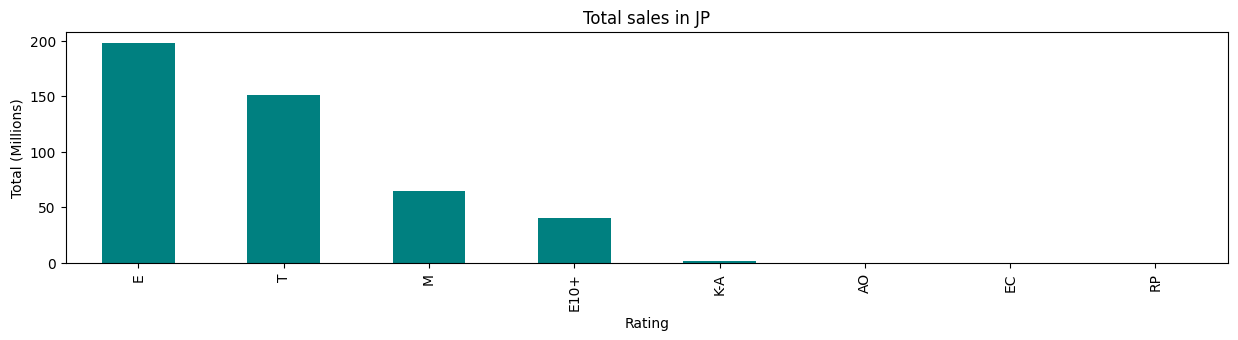

In [170]:
rating_sales(games_df,'jp_sales','teal')

- Based on the previous bar charts, we can notice that:
    - The ___E (Everyone)___ rating has the highest recorded sales in all three regions.
    - The ___T (Teenagers)___ rating is more popular in ___NA___ and ___JP___.
    - The ___M (Mature)___ rating is more popular in ___EU___ than the ___T___ rating.
    - The ___E rating___ in ___NA___ and ___EU___ generates higher revenues than in ___JP___, with ___NA___ having the highest revenue for this rating.

## HYPOTHESIS

In [181]:
# Hypothesis Testing
# Null Hypothesis (H₀): The average user ratings for Xbox One and PC are the same.
# Alternative Hypothesis (H₁): The average user ratings for Xbox One and PC are different.

xone_userscore = games_df[(games_df['platform'] == 'XOne') & (games_df['user_score'] > 0)]['user_score']

pc_userscore = games_df[(games_df['platform'] == 'PC') & (games_df['user_score'] > 0)]['user_score']
alpha = 0.05

xone_var = round(np.var(xone_userscore),2)
pc_var = round(np.var(pc_userscore),2)

print(f"XOne var: {xone_var} \nPC var: {pc_var}")

results = st.ttest_ind(xone_userscore, pc_userscore, equal_var = False) 

print('P value: ', results.pvalue, '\n')

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("We reject the null hypothesis: The average user ratings for Xbox One and PC are the same.")
else:
    print("We cannot reject the null hypothesis: The average user ratings for Xbox One and PC are the same.")


XOne var: 1.9 
PC var: 2.34
P value:  4.935072360183574e-06 

We reject the null hypothesis: The average user ratings for Xbox One and PC are the same.


Remarks

- Based on the p-value result, it is concluded that the average user ratings for the Xbox One and PC platforms are different.
- The ttest_ind method was used because it allows us to compare the means of two samples, taking into account whether their variances are similar or not.

In [180]:
# Hypothesis Testing
# Null Hypothesis (H₀): The average user ratings for the Action and Sports genres are the same.
# Alternative Hypothesis (H₁): The average user ratings for the Xbox One and PC platforms are different.

alpha = 0.05
action_userscore = games_df[(games_df['genre'] == 'Action') & (games_df['user_score'] > 0)]['user_score']
sports_userscore = games_df[(games_df['genre'] == 'Sports') & (games_df['user_score'] > 0)]['user_score']

action_var = round(np.var(action_userscore),2)
sports_var = round(np.var(sports_userscore),2)

print(f"Action var: {action_var} \nSport var: {sports_var}")

results = st.ttest_ind(xone_userscore, pc_userscore, equal_var = False) 

print('p value: ', results.pvalue, '\n')

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("We reject the null hypothesis: The average user ratings for the Action and Sports genres are the same.")
else:
    print("We cannot reject the null hypothesis: The average user ratings for the Action and Sports genres are different.")


Action var: 2.03 
Sport var: 2.59
p value:  4.935072360183574e-06 

We reject the null hypothesis: The average user ratings for the Action and Sports genres are the same.


Remarks

- Based on the p-value result, it is concluded that the average user ratings for the Action and Sports genres are different.
- The ttest_ind method was used because it allows us to compare the means of two samples, considering whether their variances are similar or not.

## FINAL CONCLUTIONS

As a general conclusion, the following observations can be made:

- Action and Sports genres are very popular regardless of the region.
- Games with an E rating are the most popular in sales.
- A platform with a higher number of sales has an approximate life cycle of 10 years, with its peak sales occurring between 4 and 6 years.
- PS2 and X360 are the most popular platforms in the sample obtained.
- If a multiplatform game is available on PS2 or X360, it has a much higher chance of generating more sales.
- The scores assigned to games do not influence sales as much as the platform on which they can be played.
